In [35]:
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
from torch.utils.data import ConcatDataset
from PIL import Image
import os



device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [47]:
def get_dataset(data_dir):
    transform = transforms.Compose([
            transforms.ToTensor()
        ])
    train_dataset = datasets.CIFAR10(
        root=data_dir, train=True, download= True,  transform=transform,
    )
    test_dataset = datasets.CIFAR10(
        root=data_dir, train=False, download= True,  transform=transform,
    )
    full_dataset = ConcatDataset([train_dataset, test_dataset])
 
    train_loader = torch.utils.data.DataLoader(
    full_dataset, batch_size=1,
     num_workers=2
)




    return (full_dataset, test_dataset.classes)




data_loader, classes = get_dataset(data_dir = './data/cifar10_1batch')

Files already downloaded and verified
Files already downloaded and verified


In [49]:
image, label  =  next(iter(data_loader))
image.shape

torch.Size([3, 32, 32])

In [46]:
path = 'data/test'
i = 1
for image, label  in  iter(data_loader):
    image_pil = transforms.ToPILImage()(image)
    image_pil.save(f'{path}/{classes[label]}_{label}_{i}.jpg')
    i += 1
    break

    


    

In [13]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [45]:
data_path = 'data/test2'


class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root, transform=None):
        self.root = root
        self.transform = transform
        self.imgs = os.listdir(root)
        self.classes = []
        
        for img_name in self.imgs:
            label = int(img_name.split('_')[1])
            name = img_name.split('_')[0]
            if name not in self.classes:
                self.classes.append(name)  
        
    def __getitem__(self, index):
        img_path = os.path.join(self.root, self.imgs[index])
        img = Image.open(img_path).convert("RGB")
        
        if self.transform is not None:
            img = self.transform(img)
        
        
        label = int(self.imgs[index].split('_')[1])
        
        return img, label
    
    def __len__(self):
        return len(self.imgs)



data_transform = transforms.Compose([
    transforms.ToTensor()
])

dataset = CustomDataset(data_path, transform=data_transform)

batch_size = 1
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)







ValueError: num_samples should be a positive integer value, but got num_samples=0

In [15]:
classes = dataset.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Text(0.5, 1.0, 'ship')

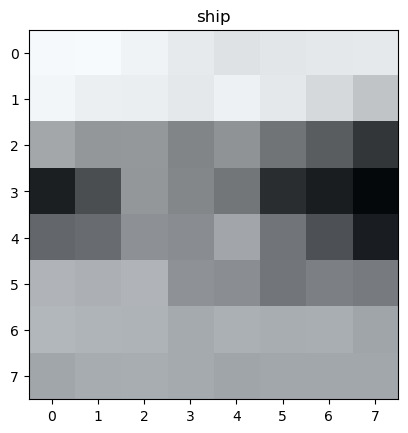

In [16]:
data_iter = iter(data_loader)
images, labels = next(data_iter)
images = images[0].numpy()
image  = np.transpose(images, (1, 2 , 0))
plt.imshow(image)
plt.title(classes[labels.item()])

In [27]:
images.shape

(1, 3, 256, 256)